# Stochastic Calculus Problem Set 2 Questions 3 and 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 3

### Part (a)

In [2]:
delta = 0.01
N = 250

m = np.array([0, 0])
C = np.reshape([1, 0.75, 0.75, 0.9], [2, 2])

In [3]:
def sample_gaussian(num_vectors=1):
    return np.random.multivariate_normal(mean=m, cov=delta*C,
                                         size=num_vectors)

### Part (b)

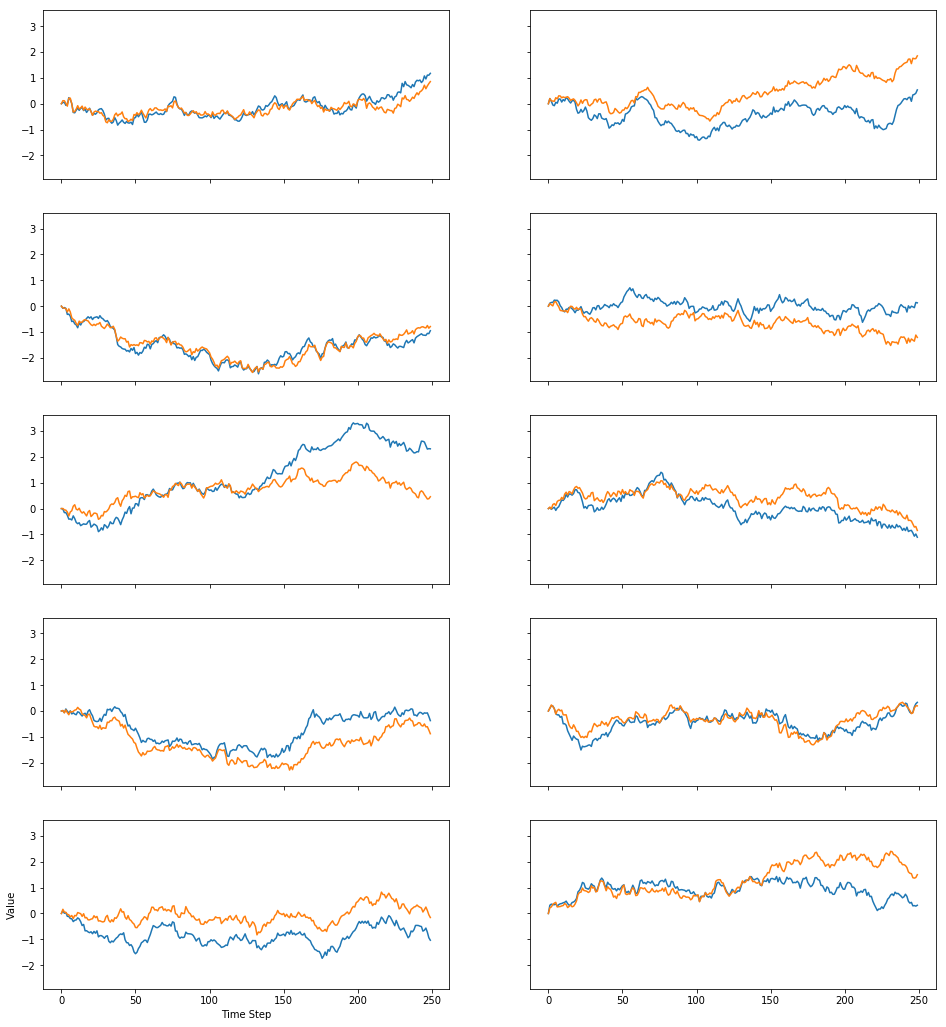

In [4]:
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=[16, 18], sharex=True, sharey=True)
for idx, ax in enumerate(axarr.flatten()):
    # Generate pair of Wiener processes
    W = np.zeros([N, 2])
    for idx, row in enumerate(W[:-1]):
        W[idx + 1] = row + sample_gaussian()

    ax.plot(W);
    
axarr[4, 0].set_xlabel('Time Step')
axarr[4, 0].set_ylabel('Value');

### Part (c)

In [5]:
alpha = np.array([0.1/N, 0.2/N])
sigma = np.reshape([0.1/N, 0.05/N, 0.1/N, 0.2/N], [2, 2])

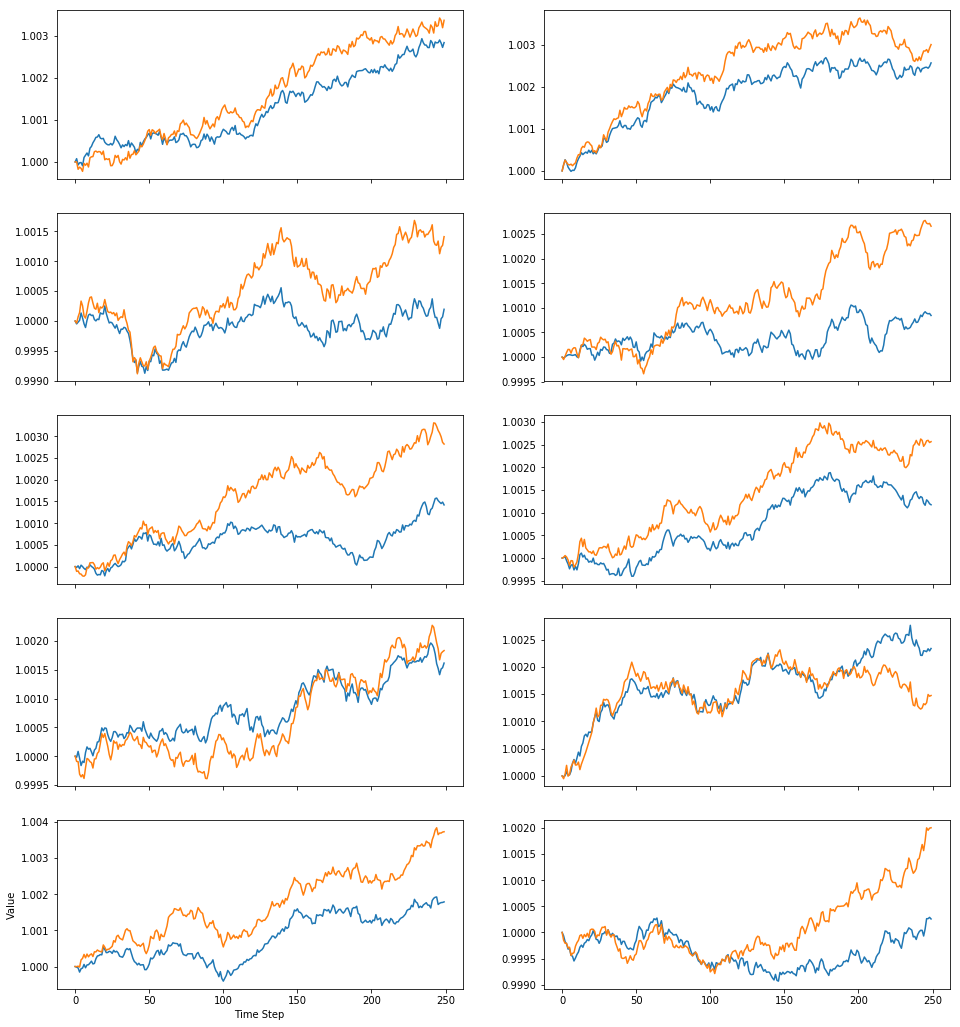

In [6]:
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=[16, 18], sharex=True)
for idx, ax in enumerate(axarr.flatten()):
    # Generate pair of Wiener processes
    S = np.ones([N, 2])
    for idx, row in enumerate(S[:-1]):
        S[idx + 1] = row + row * alpha * delta + row @ sigma * sample_gaussian()

    ax.plot(S)

axarr[4, 0].set_xlabel('Time Step')
axarr[4, 0].set_ylabel('Value');

## Question 4

### Constrained optimization problem

$$ \min_w w^T \sigma C \sigma^T w \: \text{subject to} \: \alpha^T w = \mu_V, \: \textbf{1}^T w = 1, \: w \geq 0 $$

where $\mu_V$ is some target mean return.

### Equivalent unconstrained problem

$$ \min_{w, \lambda} w^T \sigma C \sigma^T w + \lambda_1 (\alpha^T w - \mu_V) + \lambda_2 (\textbf{1}^T w - 1)$$

Setting the gradient of the Lagrangian equal to 0 gives us:

$$ 2 \sigma C \sigma^T w + \lambda_1 \alpha + \lambda_2 \textbf{1} = 0 $$

$$ \alpha^T w = \mu_V $$

$$ \textbf{1}^T w = 1 $$

In [7]:
mu_V = 1

In [8]:
mu_tilde = np.array([mu_V, 1])
m_tilde = np.vstack([alpha, np.ones_like(alpha)]).T
cov_inv = np.linalg.inv(sigma @ C @ sigma.T)
B = m_tilde.T @ cov_inv @ m_tilde

# Formula from portfolio theory
w = cov_inv @ m_tilde @ np.linalg.inv(B) @ mu_tilde

In [9]:
if (w < 0).any():
    print('w short sells. Reject.')
else:
    print('w does not short sell. Consider.')

w short sells. Reject.


In [10]:
one_zero = np.array([1, 0])
zero_one = np.array([0, 1])

one_zero_vol = one_zero.T @ sigma @ C @ sigma.T @ one_zero
zero_one_vol = zero_one.T @ sigma @ C @ sigma.T @ zero_one

In [11]:
w_max = one_zero if one_zero_vol > zero_one_vol else zero_one
w_min = one_zero if one_zero_vol < zero_one_vol else zero_one

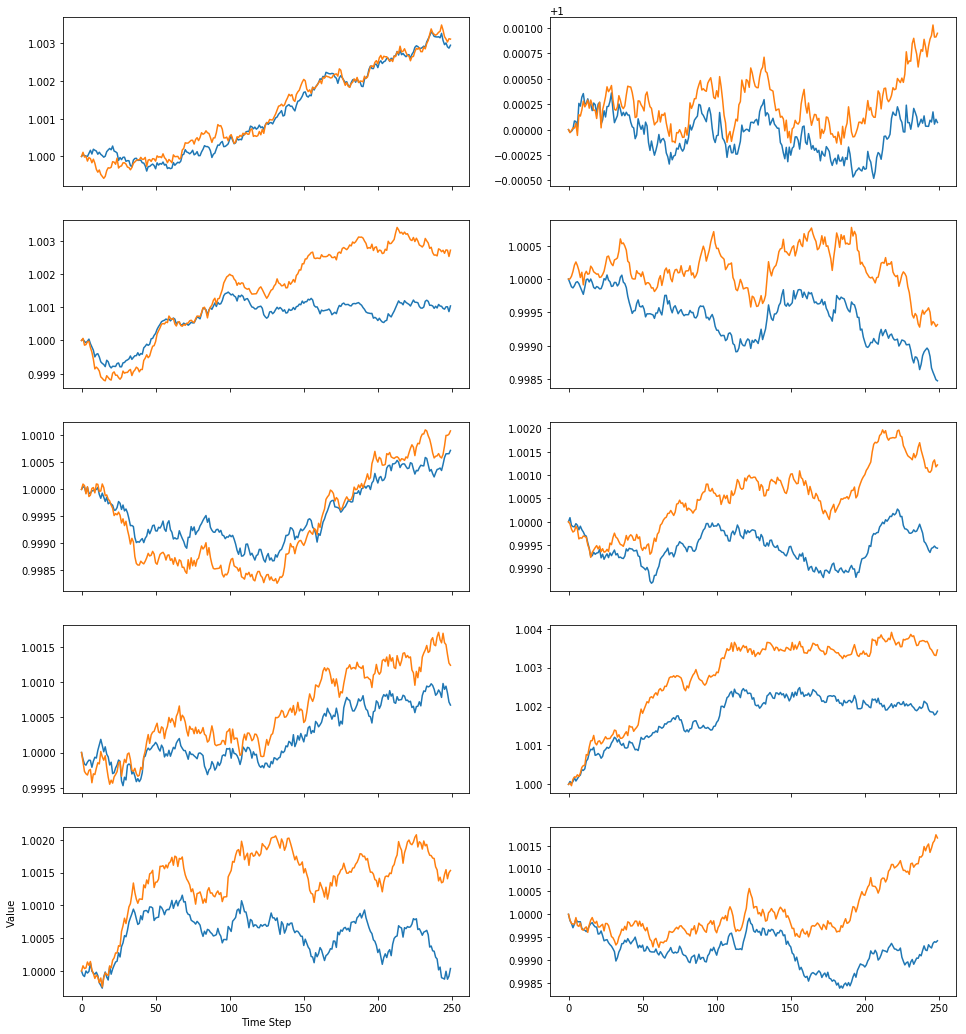

In [12]:
# Since w_max = [0, 1] and w_min = [1, 0], this problem is just a reproduction
# of question 3c. Indeed, the blue line appears to have lower variance than
# the orange line.

fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=[16, 18], sharex=True)
for idx, ax in enumerate(axarr.flatten()):
    # Generate pair of Wiener processes
    S = np.ones([N, 2])
    for idx, row in enumerate(S[:-1]):
        S[idx + 1] = row + row * alpha * delta + row @ sigma * sample_gaussian()

    ax.plot(S)

axarr[4, 0].set_xlabel('Time Step')
axarr[4, 0].set_ylabel('Value');